## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

## 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [3]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(max_depth=2,criterion='gini')

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


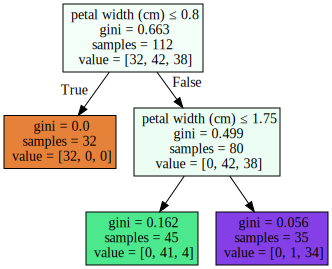

In [5]:
# graphviz 可以視覺化　(2.38 Stable Release - msi下載）
# sklearn可以直接引入graphviz
# export_graphviz(分類器名稱,out_file = None(是否儲存出一個檔案,none不存檔),feature_name = (用哪個特徵值),filled=True要塗顏色區分),special_characters=True(表示遇到特殊字元自動轉換)
# gtaohviz.source()-要呈現圖表 
# 圖表.render("xxx") - 把圖表存成pdf
# graphviz為安裝一個執行檔(類似小畫家程式)，然後在python要再安裝一個涵式庫去操控這個程式
dot = export_graphviz(clf,
                      out_file=None,
                      feature_names=iris["feature_names"],
                      filled=True,
                      special_characters=True)
graph = graphviz.Source(dot)
# graph.render("iris")
graph

In [6]:
#feature_importance結果
iris_f = clf.feature_importances_
df_iris = pd.DataFrame(np.array([iris_f]),columns=iris["feature_names"],index = ["tree"])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
tree,0.0,0.0,0.0,1.0


## 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [7]:
#boston資料集樹狀模型
# 讀取資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=4)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 衡量
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))#r2=1可能overfitting，r2>0.7以上都具高度解釋力)
#feature_importances_
a = clf.feature_importances_
a

0.7735821531944137


array([0.04547665, 0.        , 0.        , 0.        , 0.00571201,
       0.6095279 , 0.01366107, 0.03520642, 0.        , 0.        ,
       0.02756903, 0.00421012, 0.2586368 ])

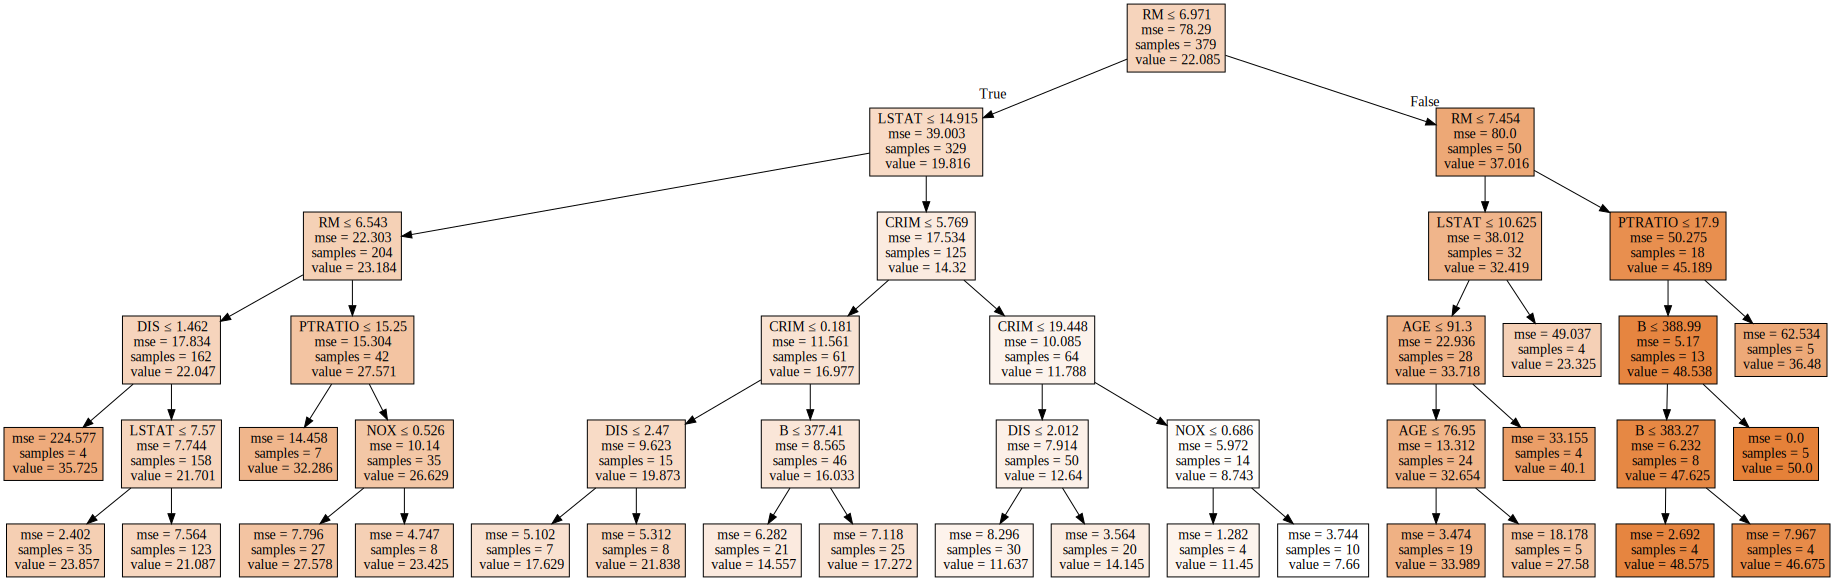

In [8]:
dot = export_graphviz(clf,
                      out_file=None,
                      feature_names=boston["feature_names"],
                      filled=True,
                      special_characters=True)
graph = graphviz.Source(dot)
# graph.render("iris")
graph

In [9]:
#boston_線性回歸
# 讀取資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

#線性模型
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
pre = reg.predict(x_test)

#衡量
# 可以看回歸模型的參數值
a_reg = reg.coef_
print('Coefficients: ', reg.coef_)

# 預測值與實際值的差距，使用 r2
r2_score(y_test,pre)

Coefficients:  [-1.18901558e-01  5.05689401e-02 -1.07427433e-02  3.66184857e+00
 -1.52957329e+01  3.39316181e+00 -5.91222130e-03 -1.49234402e+00
  3.33696220e-01 -1.50593743e-02 -8.69475207e-01  8.80571095e-03
 -4.92763225e-01]


0.7313816523148398

In [13]:
df_boston = pd.DataFrame(np.array([clf.feature_importances_,a_reg]),columns=boston["feature_names"],index = ["tree","reg"])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
tree,0.045477,0.000000,0.000000,0.000000,0.005712,0.609528,0.013661,0.035206,0.000000,0.000000,0.027569,0.004210,0.258637
reg,-0.118902,0.050569,-0.010743,3.661849,-15.295733,3.393162,-0.005912,-1.492344,0.333696,-0.015059,-0.869475,0.008806,-0.492763


In [15]:
#wine資料集樹狀模型
# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=4)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 衡量
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))#r2=1可能overfitting，r2>0.7以上都具高度解釋力)
#feature_importances_
b = clf.feature_importances_
b

0.9458333333333333


array([0.0030602 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.62601606, 0.        , 0.        , 0.11386709,
       0.        , 0.        , 0.25705664])

In [19]:
df_wine = pd.DataFrame(np.array([b]),columns=wine["feature_names"],index = ["tree"])
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
tree,0.00306,0.0,0.0,0.0,0.0,0.0,0.626016,0.0,0.0,0.113867,0.0,0.0,0.257057


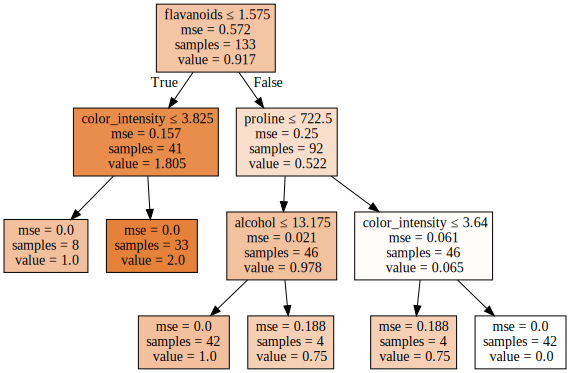

In [16]:
dot = export_graphviz(clf,
                      out_file=None,
                      feature_names=wine["feature_names"],
                      filled=True,
                      special_characters=True)
graph = graphviz.Source(dot)
# graph.render("iris")
graph

In [18]:
#wine_線性回歸
# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

#線性模型
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LogisticRegression()
reg.fit(x_train, y_train)
pre = reg.predict(x_test)

#衡量
# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)
c =  reg.coef_
# 預測值與實際值的差距，使用 r2
acc = metrics.accuracy_score(y_test, pre)
print("Acuuracy: ", acc)

Coefficients:  [[-6.94910992e-01  7.12395870e-01  9.60462398e-01 -5.57102447e-01
  -2.57710101e-02  3.15635484e-01  1.12894704e+00 -2.37975834e-02
  -4.93718650e-01  2.24935544e-02 -1.58469551e-01  8.84169254e-01
   1.71876543e-02]
 [ 9.57582868e-01 -1.06759385e+00 -5.26772201e-01  2.71787736e-01
  -6.86861613e-03 -3.52175937e-02  4.22859141e-01  3.78783233e-01
   7.60235104e-01 -1.99086425e+00  7.92398393e-01  3.05087814e-01
  -1.28524565e-02]
 [-3.51691976e-01  4.77603377e-01 -1.05559248e-01  9.62772108e-02
   3.64991817e-02 -6.55093295e-01 -1.56437365e+00 -7.33694747e-02
  -7.76253705e-01  1.20507592e+00 -4.45891716e-01 -1.18124573e+00
  -1.58834297e-03]]
Acuuracy:  0.9333333333333333
